<a href="https://colab.research.google.com/github/aliazgarkatha/1st-repository/blob/main/Web__Scrapping_assignment_ID_000529858.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup as bs
from requests import get
from random import randint
from time import sleep
from warnings import warn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
# Using User aget to avoid HTTP Error 403: Forbidden
headers = {'User-Agent':'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.106 Safari/537.36 OPR/38.0.2220.41'}


In [ ]:
years_url = [str(i) for i in range(2010, 2021)]
#As IMDB url changed using loop by release month.
#Loop every two months realease_month parameter of URL
start_months = [str(i) for i in range(1,13,4)]
end_months = [str(i) for i in range(2,13,4)]
data = []
request_number = 0

In [ ]:
# Using Loop through the years_url list to show variation of the release_year parameter of the URL
for year in years_url:

        # Loop through each four months to show the variation of release_month pararameter of URL
        for (start_month, end_month) in zip(start_months, end_months):

                # just input month & year, web will auto create release_date from the first day of month 1 to the last date of month 2
                url = 'https://www.imdb.com/search/title/?release_date='+ year + '-' + start_month + ',' + year + '-' + end_month
                response = get(url, headers=headers)

                # Pause the loop for a time interval between 8 and 15 seconds
                pause = randint(8, 16)
                sleep(pause)

                # Using a response status code for non-200 status codes
                if response.status_code != 200:
                        warn(f'The request number {request_number} is a non-200 status code: {response.status_code}')

                # Convert the response‘s HTML content to a BeautifulSoup object
                soup = bs(response.content, 'html.parser')

                # Extract all movie containers from this BeautifulSoup object
                movie_containers = soup.find_all('li',class_="ipc-metadata-list-summary-item")

                # Loop through all these containers
                for container in movie_containers:

                        if container.find('span',class_="metacritic-score-box"):

                                # Extract the data if a container has a Metascore
                                if container.find('span',class_="metacritic-score-box"):
                                        movie = container.h3.text.strip('-,() ')[3:]
                                        year = container.find('span',class_="dli-title-metadata-item").text
                                        imdb_rating =container.find('span',class_="ipc-rating-star--imdb").text.strip('-,() ')[0:4]
                                        metascore =container.find('span',class_="metacritic-score-box").text
                                        votes = container.find('span',class_="sc-21df249b-7 HoyXN").find_next_sibling(string=True)
                                        data.append([movie, year, imdb_rating, metascore, votes])

                # count the number of requests
                request_number += 1

                # Break the loop release_month parameter if the number of request is greater than the 70 expected
                if request_number > 70:
                        print(f'The number of request is greater than the 70 expected')
                        break

        # Break the loop release_year parameter if the number of request is greater than the 70 expected
        if request_number > 70:
                break

print('Total request:', request_number)

#	Create a Pandas Dataframe to hold the info scraped (movie, years imdb_ratings, metascore, votes)
print('The data info scraped from IMDB is:')
IMDB_data = pd.DataFrame(data, columns=['Movie', 'Year', 'IMDB Rating', 'Metascore', 'Votes'])
IMDB_data

Total request: 33
The data info scraped from IMDB is:


,Movie,Year,IMDB Rating,Metascore,Votes
0,Legion,2010,5.3,32,"110,110"
1,Shutter Island,2010,8.2,63,"1,410,241"
2,Alice in Wonderland,2010,6.4,53,"433,595"
3,Percy Jackson & the Olympians: The Lightning T...,2010,5.9,47,"197,257"
4,Blue Valentine,2010,7.3,81,"207,704"
...,...,...,...,...,...
943,Ammonite,2020,6.5,72,"21,977"
944,The Babysitter: Killer Queen,2020,5.8,22,"48,970"
945,Honest Thief,2020,6.0,46,"55,888"
946,Simple Passion,2020,5.5,57,969


In [ ]:
#Saving all the data frames in a csv file
IMDB_data.to_csv('IMDB_data.csv', index = False)

In [ ]:
# To remove A^ symbol in the file using utf-8-sig encoding
IMDB_data.to_csv('IMDB_data.csv', encoding='utf-8-sig', index=False)

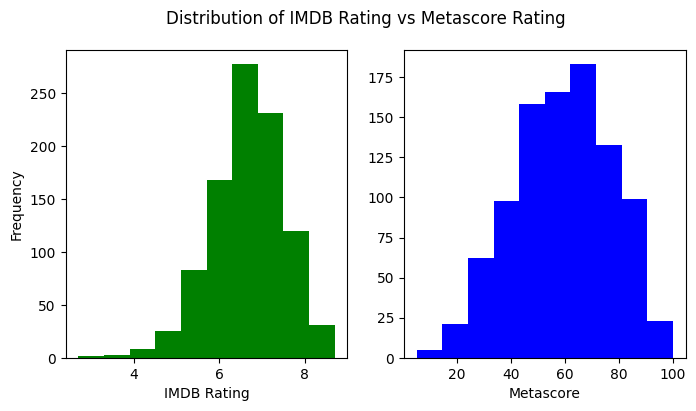

In [ ]:
# Use matplotlib to create two histograms to visually compare the average IMDB rating to the average metascore rating
IMDB_data['IMDB Rating'] = IMDB_data['IMDB Rating'].astype(float)
IMDB_data['Metascore'] = IMDB_data['Metascore'].astype(float)
fig, axes = plt.subplots(1,2, figsize = (8,4))
axes[0].hist(IMDB_data['IMDB Rating'], bins=10, color='Green')
axes[1].hist(IMDB_data['Metascore'], bins=10, color='Blue')
axes[0].set_xlabel('IMDB Rating')
axes[1].set_xlabel('Metascore')
axes[0].set_ylabel('Frequency')
plt.suptitle('Distribution of IMDB Rating vs Metascore Rating')
plt.show()